In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

c:\Users\chris\miniconda3\envs\datascience\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Over/underfitting

$p(x) = \sum_{i=0}^I a_i x_i^i$

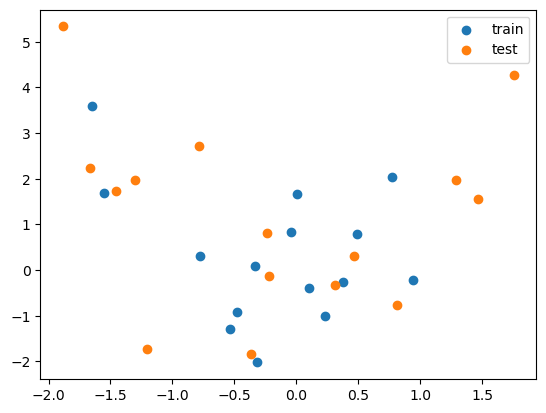

In [3]:
N = 30;
train_size = 15;
x = np.random.normal(0,1,size=N);
y = x**2 + np.random.normal(0,1,size=N);
x_train = x[:train_size];
x_test = x[train_size:];

y_train = y[:train_size];
y_test = y[train_size:];

plt.scatter(x_train,y_train, label = 'train');
plt.scatter(x_test, y_test, label='test');
plt.legend();
plt.show();

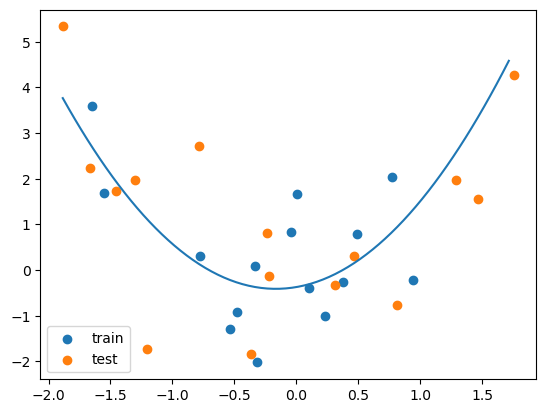

In [4]:
z = np.polyfit(x_train, y_train, 2);
p = np.poly1d(z);
range_x = np.arange(np.min(x), np.max(x), .05)

plt.scatter(x_train,y_train, label = 'train');
plt.scatter(x_test, y_test, label='test');
plt.plot(range_x, p(range_x));
plt.legend();
plt.show();

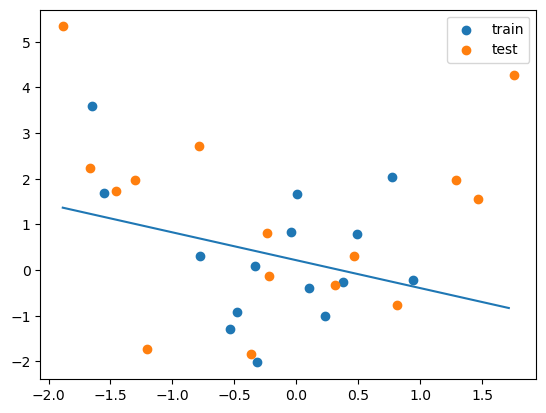

In [13]:
z1 = np.polyfit(x_train, y_train, 1);
p1 = np.poly1d(z1);
range_x = np.arange(np.min(x), np.max(x), .05)

plt.scatter(x_train,y_train, label = 'train');
plt.scatter(x_test, y_test, label='test');
plt.plot(range_x, p1(range_x));
plt.legend();
plt.show();

# Neural network: hyperparameters

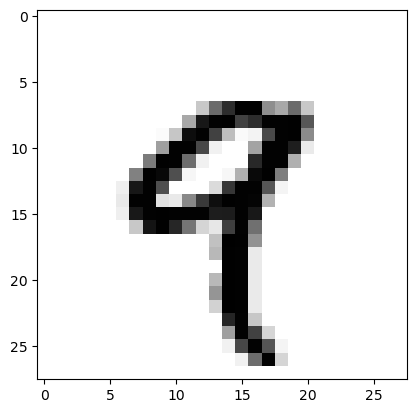

9


In [14]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
plt.imshow(train_images[4],cmap=plt.cm.binary)
plt.show()
print(train_labels[4])

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    train_images,
    train_labels,
    epochs=60,
    batch_size = 512,
    validation_data = (test_images, test_labels)
)

Epoch 1/60
118/118 [==============================] - 3s 13ms/step - loss: 10.8127 - accuracy: 0.8230 - val_loss: 2.8139 - val_accuracy: 0.9012
Epoch 2/60
118/118 [==============================] - 1s 8ms/step - loss: 1.9814 - accuracy: 0.9148 - val_loss: 1.7498 - val_accuracy: 0.9186
Epoch 3/60
118/118 [==============================] - 1s 8ms/step - loss: 1.1383 - accuracy: 0.9335 - val_loss: 1.2913 - val_accuracy: 0.9249
Epoch 4/60
118/118 [==============================] - 1s 8ms/step - loss: 0.7462 - accuracy: 0.9453 - val_loss: 1.0886 - val_accuracy: 0.9345
Epoch 5/60
118/118 [==============================] - 1s 9ms/step - loss: 0.5344 - accuracy: 0.9551 - val_loss: 0.9378 - val_accuracy: 0.9379
Epoch 6/60
118/118 [==============================] - 1s 8ms/step - loss: 0.3942 - accuracy: 0.9614 - val_loss: 0.8847 - val_accuracy: 0.9404
Epoch 7/60
118/118 [==============================] - 1s 9ms/step - loss: 0.3032 - accuracy: 0.9667 - val_loss: 0.8529 - val_accuracy: 0.9421
Epoc

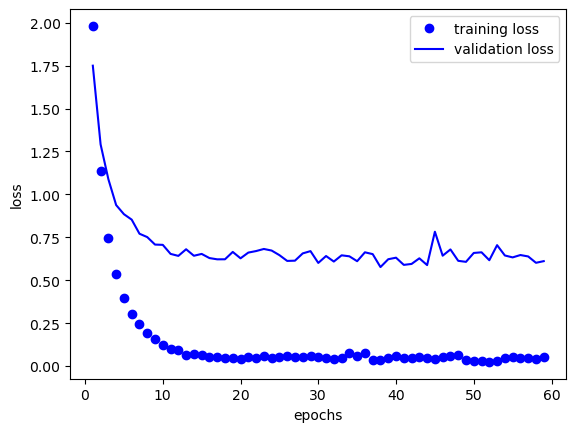

In [19]:
loss = history.history['loss'][1:]
val_loss = history.history['val_loss'][1:]
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss, 'bo', label='training loss');
plt.plot(epochs, val_loss, 'b', label = 'validation loss');
plt.legend();
plt.xlabel("epochs");
plt.ylabel("loss");
plt.show()

In [20]:
import requests
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
r = requests.get(url, allow_redirects=True);
open("./data/iris.csv", 'wb').write(r.content);

In [21]:
import pandas as pd

In [25]:
df = pd.read_csv(
    "./data/iris.csv",
    header = None,
    names = [
        "sepal_length",
        "sepal_width",
        "petal_length",
        "petal_width",
        "species"
    ]
)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
df["species"].replace(
    {
        "Iris-setosa": 0,
        "Iris-versicolor": 1,
        "Iris-virginica": 2
    },
    inplace = True
)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


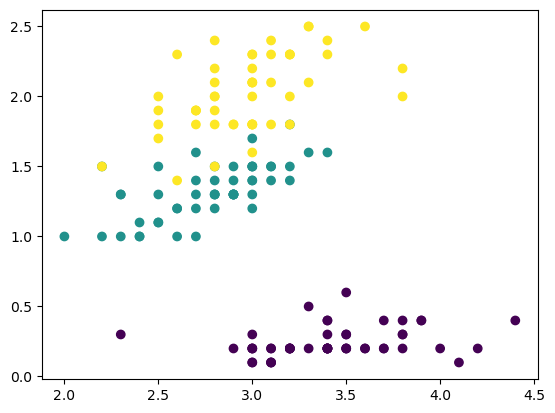

In [30]:
plt.scatter(
    df["sepal_width"],
    df["petal_width"],
    c = df["species"]
)

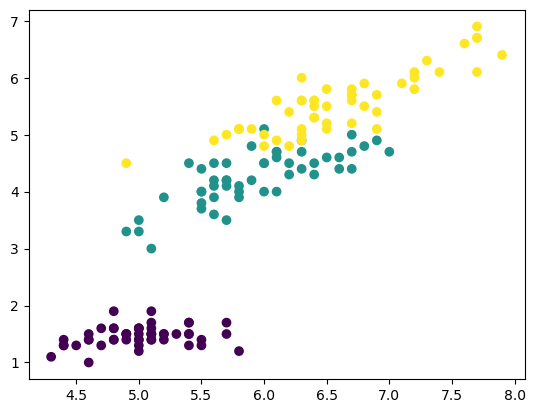

In [32]:
plt.scatter(
    df['sepal_length'],
    df['petal_length'],
    c = df['species']
)

In [38]:
X = np.zeros(
    [150,4]
)
i = 0

for col in df.columns[0:4]:
    x = df[col].values
    X[:,i] = (x-x.mean())/x.std()
    i += 1

y = df['species'].values

In [39]:
x

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [41]:
model = keras.Sequential(
    [
        keras.layers.Dense(20, input_dim = 4, activation='relu'),
        keras.layers.Dense(10, activation = 'relu'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(
    X,
    y,
    epochs = 10
)

Epoch 1/10
5/5 [==============================] - 1s 7ms/step - loss: 1.3436 - accuracy: 0.3200
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 1.2910 - accuracy: 0.3533
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 1.2411 - accuracy: 0.3867
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 1.1946 - accuracy: 0.4067
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 1.1527 - accuracy: 0.3667
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 1.1127 - accuracy: 0.3200
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: 1.0748 - accuracy: 0.3667
Epoch 8/10
5/5 [==============================] - 0s 8ms/step - loss: 1.0388 - accuracy: 0.3600
Epoch 9/10
5/5 [==============================] - 0s 4ms/step - loss: 1.0034 - accuracy: 0.3533
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 0.9687 - accuracy: 0.3933


In [43]:
y_pred = model.predict(X)
matrix = tf.math.confusion_matrix(y, y_pred.argmax(axis=1))
matrix

5/5 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[11, 39,  0],
       [ 0,  3, 47],
       [ 0,  0, 50]])>

## Confusion matrix

* Rows are true labels, columns are predictions
* Main diagonal must be high

# Treatment effects

Research question: what is the effect of training on productivity?

In [47]:
N = 100
tenure = np.random.uniform(0, 50, size = N)
#tauu = np.random.random(N).round(0)
tauu = np.random.choice(np.array([0,1]), size = N, replace=True)
X = 0.8 * tenure + 5 * tauu + np.random.normal(size = N)

df = pd.DataFrame(
    {
        'tenure': tenure,
        'tauu': tauu,
        'X': X
    }
)
df.head()

,tenure,tauu,X
0,36.391951,1,33.546698
1,19.639394,1,20.201673
2,29.869511,0,24.735238
3,15.564021,0,12.461629
4,3.756311,1,7.057948


In [48]:
import statsmodels.formula.api as smf

In [49]:
smf.ols('X ~ tauu', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     3.397
Date:                Tue, 05 Mar 2024   Prob (F-statistic):             0.0683
Time:                        10:30:26   Log-Likelihood:                -373.76
No. Observations:                 100   AIC:                             751.5
Df Residuals:                      98   BIC:                             756.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.0623      1.497     13.398      0.000      17.091      23.034
tauu           3.7911      2.057      1.843      0.068      -0.291       7.873
==============================================================================
Omnibus:                       13.007   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.170
Skew:                          -0.100   Prob(JB):                        0.124
Kurtosis:                       2.020   Cond. No.                         2.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""